### 박종혁 others
- Kernel size = 23

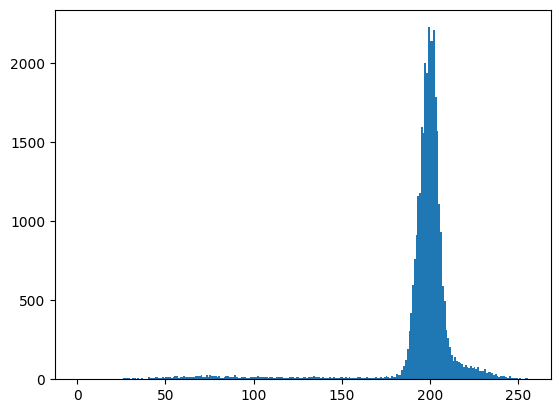

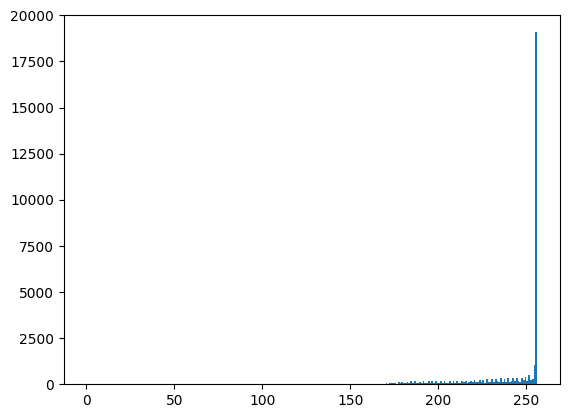

24 77 107 32 0
135 74 79 33 1
22 20 73 34 2
102 18 62 32 3
168 14 62 36 4


In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/jong2.jpg"
img = cv2.imread(path)
scale = 0.15
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 160, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 300:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = -7     # 사각형 여유
i = 27

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    print(x,y,w,h, pos)
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    img_crop = cv2.resize(img_crop, dsize=(64, 64), interpolation=cv2.INTER_AREA)
    
    path = "./dataset/pjh/4/pjh4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()


In [59]:
import cv2

h = []
w = []

# img size check
for i in range(27,32):
    path = "./dataset/pjh/4/pjh4_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 65:
        print("max", img.shape, i)
    if max(shape) < 50:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (82, 93, 3) 27
min (48, 48, 3) 30
min (48, 48, 3) 31
h_average : 60.2
w_average : 62.6


### 권준형 others
- Kernel size = 21

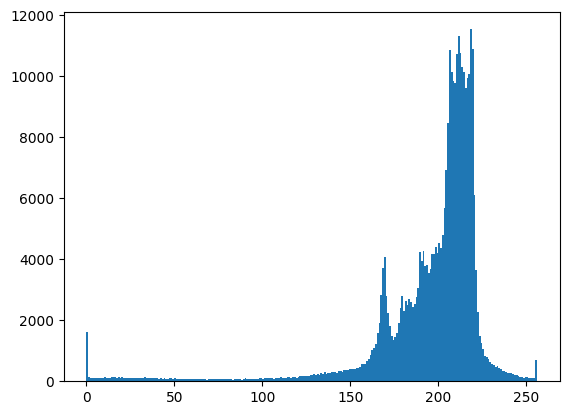

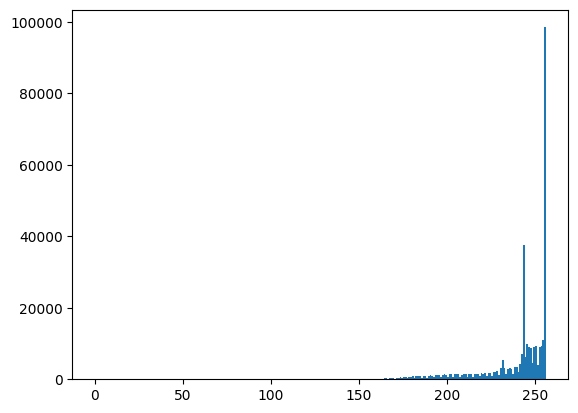

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/jun1.jpg"
img = cv2.imread(path)
scale = 0.7
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 225, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

# contour_pos = []    # Contour 좌표 추출
# for pos in range(len(contours)):
#     area = cv2.contourArea(contours[pos])
#     if area > 300:    # 잘못된 영역 제거
#         contour_pos.append(pos)

# img_temp = img_bin  # 글씨 추출 source
# tmp0 = 5     # 사각형 여유
# i = 0

# for pos in contour_pos: # 면적 부분 오려내기
#     x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
#     print(x,y,w,h, pos)
#     # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
#     if h > w :
#         tmp1 = int((h-w)/2)
#         img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
#     else:
#         tmp1 = int((w-h)/2)
#         img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
#     img_crop = cv2.resize(img_crop, dsize=(64, 64), interpolation=cv2.INTER_AREA)
    
#     path = "./dataset/kjh/4/kjh4_" + str(i) + ".jpg"
#     cv2.imwrite(path, img_crop) # 추출 글씨 저장
#     i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

### 방소나 others
- Kernel size = 25, 23

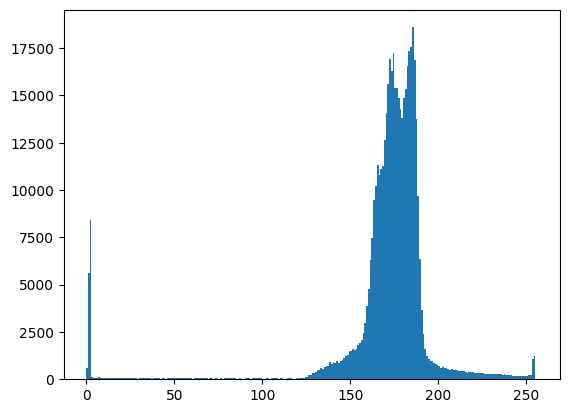

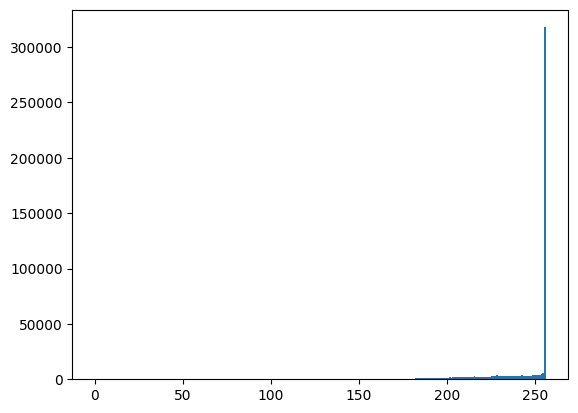

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/bsn1.jpg"
img = cv2.imread(path)
scale = 0.3
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 250, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 300:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 1     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/bsn/4/bsn4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(31):
    path = "./dataset/bsn/4/bsn4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)
 

### 최호원

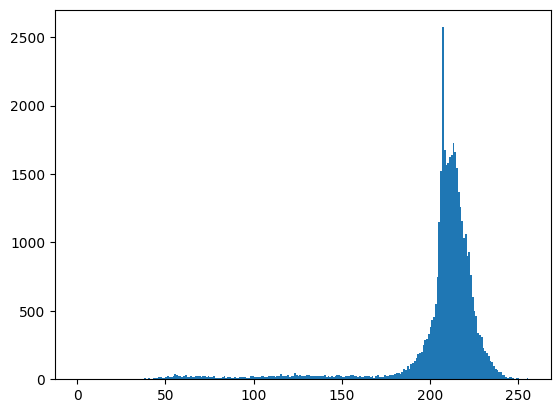

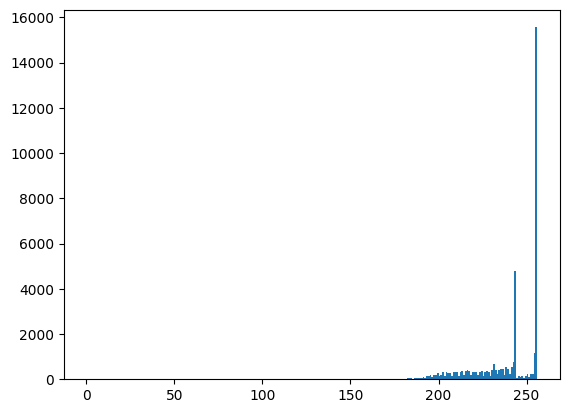

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/chw3.jpg"
img = cv2.imread(path)
scale = 0.2
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 160, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 235, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 300:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 1     # 사각형 여유
i = 9

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/chw/4/chw4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(5,9):
    path = "./dataset/chw/4/chw4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)
 

### 이종호 
- Kernel size = 21

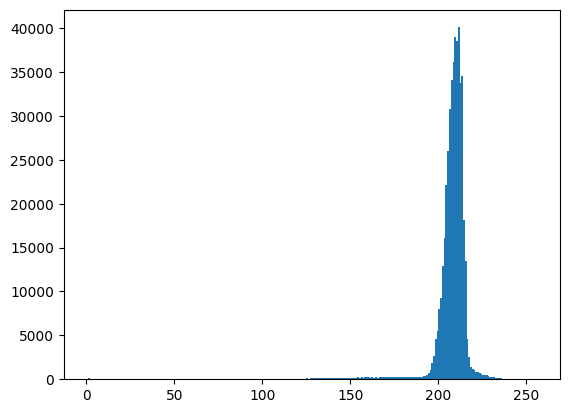

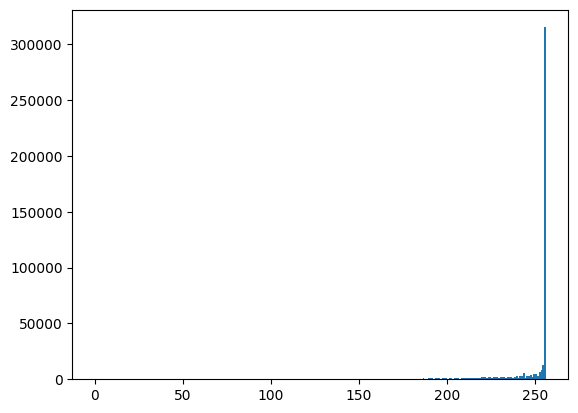

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/ljh1.jpg"
img = cv2.imread(path)
scale = 0.6
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 190, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 240, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 400:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 0     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/ljh/4/ljh4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(33):
    path = "./dataset/ljh/4/ljh4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)
 

### 신우섭
- Kernel size = 31

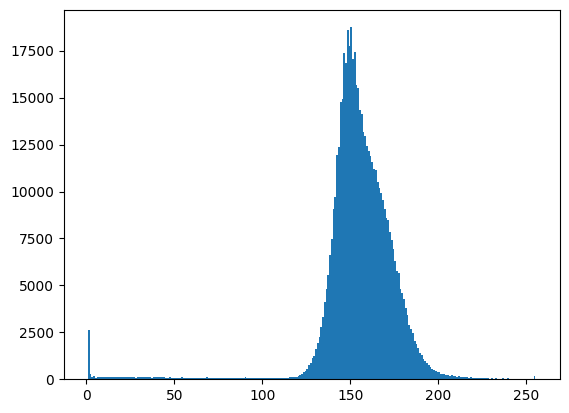

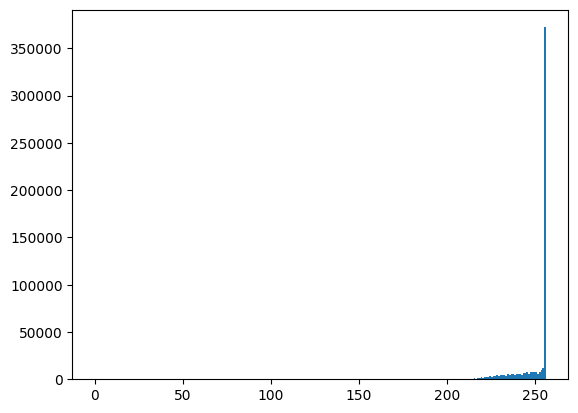

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/sws1.jpg"
img = cv2.imread(path)
scale = 0.3
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 250, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 400:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 0     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/sws/4/sws4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [96]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(34):
    path = "./dataset/sws/4/sws4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)
 

### 김범준
- Kernel size = 

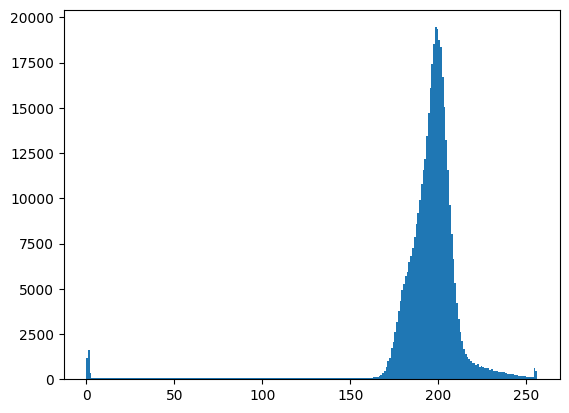

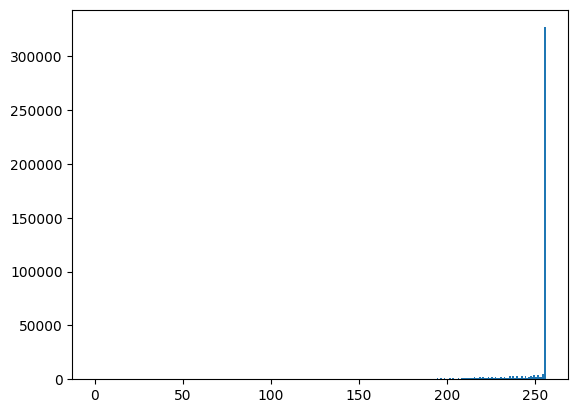

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/kbj1.jpg"
img = cv2.imread(path)
scale = 0.3
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 250, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 400:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 0     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/kbj/4/kbj4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [101]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(28):
    path = "./dataset/kbj/4/kbj4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)


### 이승언

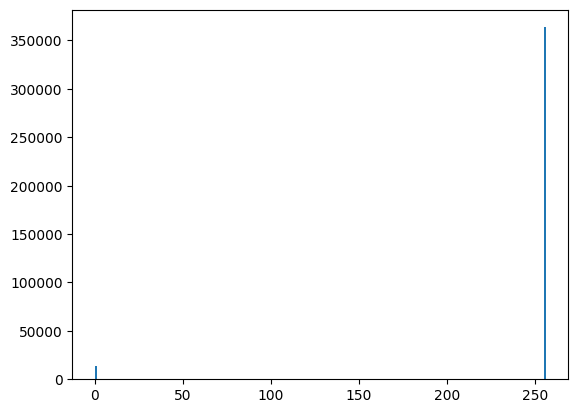

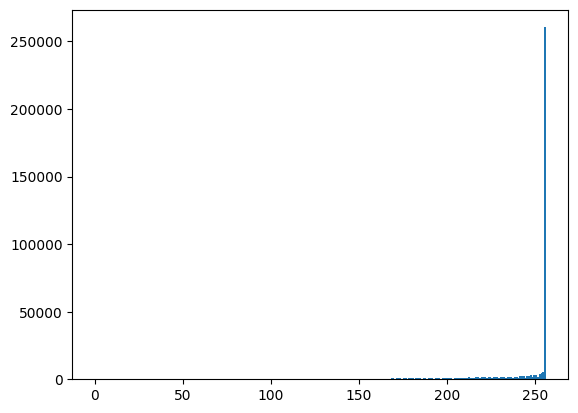

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/lse1.jpg"
img = cv2.imread(path)
scale = 0.6
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 250, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 400:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 0     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/lse/4/lse4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(46):
    path = "./dataset/lse/4/lse4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    cv2.imwrite(path, img0)


### 석현빈

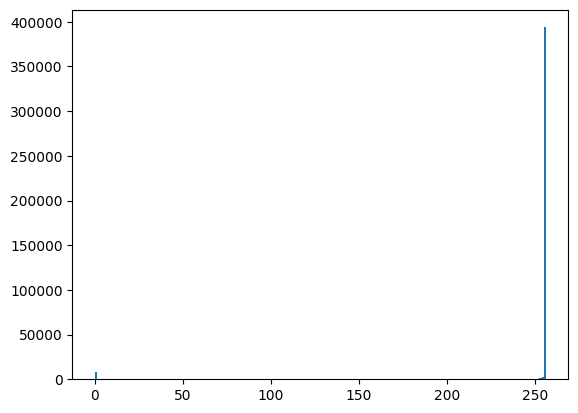

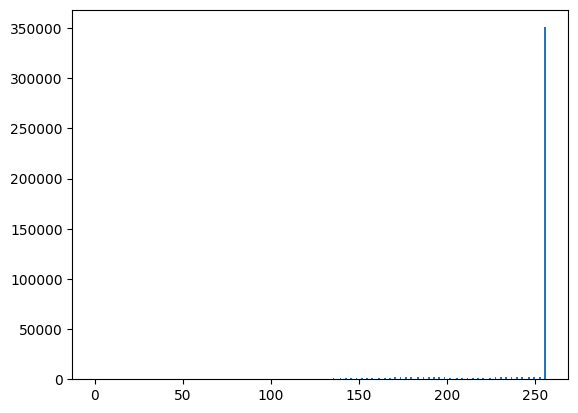

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))                # chw1 : 25
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/shb1.jpg"
img = cv2.imread(path)
scale = 0.8
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)       # chw1:170
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()  

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 252, 255, cv2.THRESH_BINARY)     # chw1:240
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 400:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 0     # 사각형 여유
i = 0

for pos in contour_pos:     # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    img_crop = img_temp[y-tmp0:y+h+tmp0, x-tmp0:x+w+tmp0]
    
    path = "./dataset/shb/4/shb4_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [120]:
import cv2

def img_enlarge(img):
    h, w, c = img.shape

    if w >= h: 
        length = int((w-h)/2)
        tmp_img = np.ones((length, w, 3),dtype=np.uint8) * 255
        result = cv2.vconcat([tmp_img, img, tmp_img])
    else:
        length = int((h-w)/2)
        tmp_img = np.ones((h, length, 3),dtype=np.uint8) * 255
        result = cv2.hconcat([tmp_img, img, tmp_img])

    return result

for i in range(34):
    path = "./dataset/shb/4/shb4_"+str(i)+".jpg"
    img = cv2.imread(path)
    
    img0 = img_enlarge(img)
    img0 = cv2.resize(img0, (64,64))
    
    # Unsharped mask 적용 #
    t_rimg = cv2.cvtColor(img0, cv2.COLOR_BGR2YCrCb)
    Y, Cr, Cb = cv2.split(t_rimg)
    blur = cv2.GaussianBlur(Y, (0,0), 2)
    filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
    img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)
    
    cv2.imwrite(path, img_unsharped)
